# Numerically solving and plotting a system of Ordinary Differential Equations

We are approximating the solution to $y'(t) = f(t,y)$ subject to $y(0)=y_0$ from $t=0$ to $t=T$. $y$ is an $n$-vector.

$x$[state,time index] is a matrix where state = 0 is always time, and the other n states correspond to the $n$ components in the unknown $n$-vector $y$.

Since we want to plot each component of $y$ over time, we will need to record $y$ at each time step.

In [17]:
# %pylab inline  #if you uncomment this, you do not need to specify "np." or "np.linalg." in the code.
import time
import numpy as np
import matplotlib.pyplot as plt

In [93]:
initial_y_value = [10.0, 0.1, 0.0]  #Value of each y_i at t = 0
h = 0.01  # h is the time step, delta t
T = 14.0  # T is the time where we want to approximate the unknown function y.  
         # T needs to be an integer multiple of h.
N = int(T/h)

n = len(initial_y_value)

x = np.zeros((n+1,N+1))  # n+1 because the 0th entry is time. N+1 because we have both t=0 and t=T

In [94]:
def f(x):  #This returns the output of the function f for which x'=f(x) 
    func = np.zeros(n+1)
    func[0] = 1.0
    
    #SIR model
    beta = 0.6 # proportion of susceptible that become infected
    gamma = 1.9 # proportion of infected that recover
    mu = 0.2  # proportion of recovered that become susceptible
    
    func[1] = x[0] + h*(-1*beta*x[0]*x[1] + mu*x[2]) # INSERT YOUR CODE HERE!
    func[2] = x[1] + h*(beta*x[0]*x[1] - gamma*x[1]) # INSERT YOUR CODE HERE!
    func[3] = x[2] + h*(gamma*x[1] - mu*x[2]) # INSERT YOUR CODE HERE!
    return func

In [95]:
#MAIN
start = time.process_time()

x[0,0] = 0  #initial t value
x[1:,0] = initial_y_value
for i in range (1, N+1):
    # INSERT YOUR CODE HERE!
    x[:, i] = f(x[1:, i-1])
    x[0, i] = x[0, i-1] + h
    print(x[:, i])
    
print("This took", time.process_time() - start, "seconds.")

print(x)


[1.000e-02 9.994e+00 1.041e-01 1.900e-03]
[2.00000000e-02 9.98776155e+00 1.08364352e-01 3.87410000e-03]
[3.00000000e-02 9.98127539e+00 1.12799334e-01 5.92527450e-03]
[4.00000000e-02 9.97453196e+00 1.17411434e-01 8.05661128e-03]
[0.05       9.96752132 0.12220736 0.01027132]
[0.06       9.96023324 0.12719405 0.01257271]
[0.07       9.95265709 0.13237866 0.01496425]
[0.08       9.9447819  0.13776858 0.01744952]
[0.09       9.93659633 0.14337144 0.02003222]
[0.1        9.92808865 0.14919513 0.02271622]
[0.11       9.91924675 0.15524776 0.02550549]
[0.12       9.91005811 0.1615377  0.02840419]
[0.13       9.90050983 0.16807357 0.0314166 ]
[0.14       9.89058858 0.17486426 0.03454716]
[0.15       9.88028062 0.1819189  0.03780049]
[0.16       9.86957176 0.1892469  0.04118135]
[0.17       9.85844741 0.19685792 0.04469467]
[0.18       9.84689251 0.2047619  0.04834558]
[0.19       9.8348916  0.21296903 0.05213937]
[0.2        9.82242871 0.22148979 0.0560815 ]
[0.21       9.80948747 0.23033489 0.

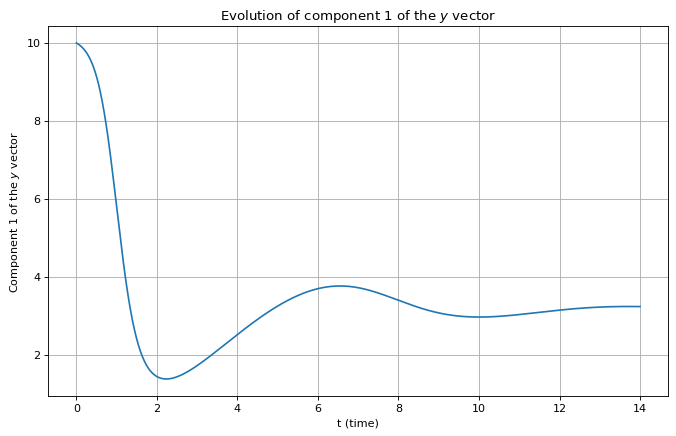

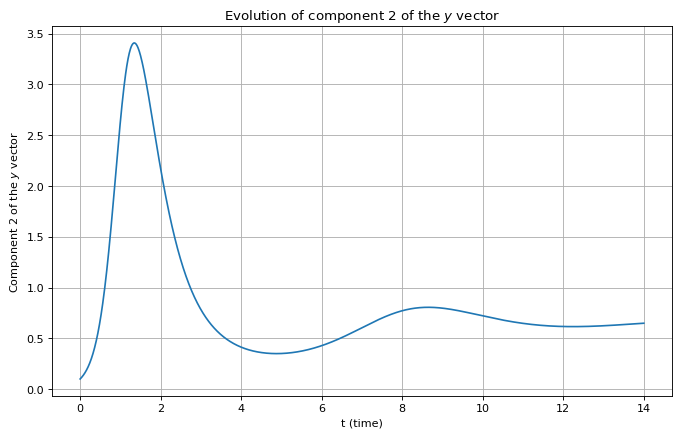

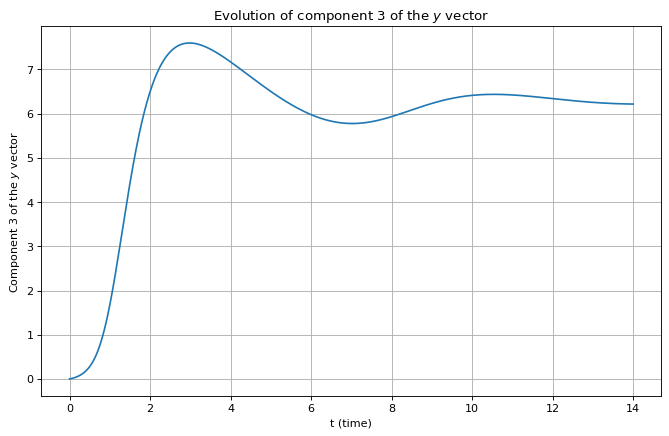

In [96]:
t_plot = x[0,:]

for i in range(1,n+1):
    plt.figure(figsize=(10, 6), dpi=80)
    plt.plot(t_plot,x[i,:])
    plt.title("Evolution of component " + str(i) + " of the $y$ vector")
    plt.xlabel('t (time)'); plt.ylabel("Component " + str(i) + " of the $y$ vector")
    plt.grid()
